---
<h1><center> Loan Default Predictor Project </center></h1>

--- 

## Goal

The goal of the project is to develop a model that could identify loans that will go in default with high degree of accuracy. The model could be used to assess default risk for existing loans and for loan adjudication.

---

## Dataset

“Lending Club Loan Data” dataset was retrieved from kaggle.com ( https://www.kaggle.com/wendykan/lending-club-loan-data/home ). The data set contains complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. Additional features include credit scores, number of finance inquiries, address including zip codes, state, loan term, interest rate, and collections among others. The data set is a matrix of ~ 890,000 observations (loans issued through Lending Club peer-to-peer lending platform) and 74 variables/features.

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df_loan = pd.read_csv('loan.csv')

## Exloratory Data Analysis

In [4]:
# Checking the number of rows an columns in the dataset.
df_loan.shape

(887379, 74)

In [5]:
pd.set_option('display.max_columns', 500)
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Retrieving columns names and types.
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

Assessing distribution of loan amounts. High number of loans whose amounts are close to round numbers (10,000 USD, 15,000 USD, etc.).

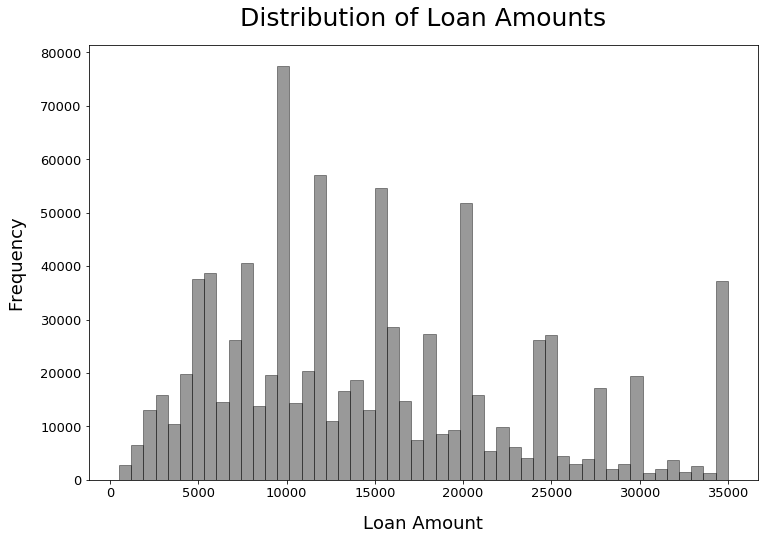

In [7]:
plt.figure(figsize=(12,8))
h = sns.distplot(df_loan['loan_amnt'], kde=False, norm_hist=False, color='black', hist_kws=dict(edgecolor="black", linewidth=1))
h.axes.set_title("Distribution of Loan Amounts", y=1.03, fontsize=25)
h.set_xlabel("Loan Amount",fontsize=18, labelpad = 15)
h.set_ylabel("Frequency",fontsize=18, labelpad = 15)
h.tick_params(labelsize=13)
plt.show();

Assessing distribution of interest rates. Interest rate on most loans falls within the range from 5% to 20%.

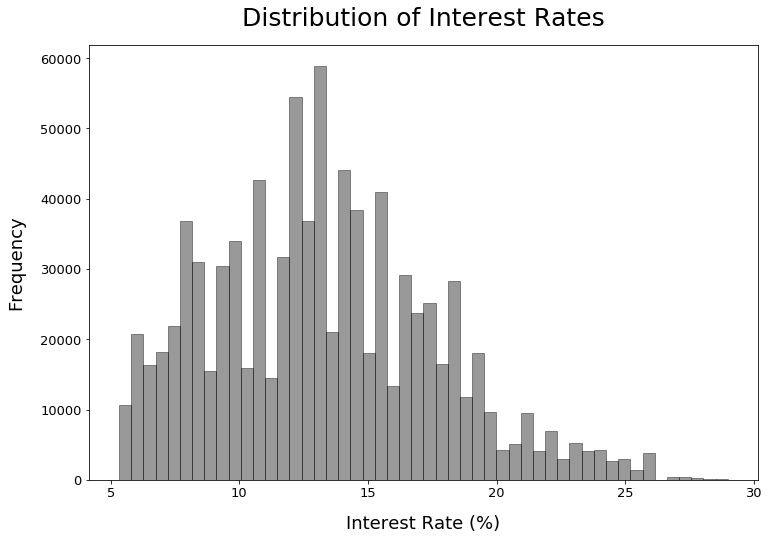

In [8]:
plt.figure(figsize=(12,8))
h = sns.distplot(df_loan['int_rate'], kde=False, norm_hist=False, color='black', hist_kws=dict(edgecolor="black", linewidth=1))
h.axes.set_title("Distribution of Interest Rates", y=1.03, fontsize=25)
h.set_xlabel("Interest Rate (%)",fontsize=18, labelpad = 15)
h.set_ylabel("Frequency",fontsize=18, labelpad = 15)
h.tick_params(labelsize=13)
plt.show();

In [9]:
# Adding new column to capture year when loans were issued.
df_loan.insert(15, 'issue_y', ' ')

In [10]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_y,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_loan['issue_y'] = df_loan.issue_d.str[6:10]

In [12]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_y,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_loan['issue_y'] = df_loan['issue_y'].astype(int)

In [14]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 75 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_y                        887379 non-null int64
issue_d               

In [15]:
df_loan['issue_y'].unique()

array([11, 10,  9,  8,  7, 13, 12, 14, 15])

In [16]:
df_loan_year = df_loan.groupby('issue_y').count()

In [17]:
display(df_loan_year)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
issue_y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,603,603,603,603,603,603,603,603,603,603,549,603,603,599,603,603,603,603,603,588,603,603,603,603,603,574,574,574,564,561,574,574,603,571,574,603,603,603,603,603,603,603,603,603,603,603,603,352,600,458,0,603,603,0,0,0,574,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2393,2393,2393,2393,2393,2393,2393,2393,2393,2393,2296,2393,2393,2393,2393,2393,2393,2393,2393,2393,2393,2392,2393,2393,2393,2393,2393,2393,1482,942,2393,2393,2393,2381,2393,2393,2393,2393,2393,2393,2393,2393,2393,2393,2393,2390,2393,831,2393,2393,0,2393,2393,0,0,0,2393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,5281,5281,5281,5281,5281,5281,5281,5281,5281,5281,4986,5281,5281,5281,5281,5281,5281,5281,5281,5123,5281,5280,5281,5281,5281,5281,5281,5281,1745,253,5281,5281,5281,5265,5281,5281,5281,5281,5281,5281,5281,5281,5281,5281,5281,5265,5281,565,5281,5281,0,5281,5281,0,0,0,5281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,12537,12537,12537,12537,12537,12537,12537,12537,12537,12537,11793,12184,12537,12537,12537,12537,12537,12537,12537,8412,12537,12526,12537,12537,12537,12537,12537,12537,4478,752,12537,12537,12537,12516,12537,12537,12537,12537,12537,12537,12537,12537,12537,12537,12537,12511,12537,1016,12536,12537,0,12537,12537,0,0,0,12537,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,21721,21721,21721,21721,21721,21721,21721,21721,21721,21721,20285,20962,21721,21721,21721,21721,21721,21721,21721,12726,21721,21721,21721,21721,21721,21721,21721,21721,7340,1143,21721,21721,21721,21712,21721,21721,21721,21721,21721,21721,21721,21721,21721,21721,21721,21683,21721,2046,21721,21721,0,21721,21721,0,0,0,21721,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,53367,53367,53367,53367,53367,53367,53367,53367,53367,53367,50195,51442,53367,53367,53367,53367,53367,53367,53367,32746,53367,53365,53367,53367,53367,53367,53367,53367,21966,1474,53367,53367,53367,53320,53367,53367,53367,53367,53367,53367,53367,53367,53367,53367,53367,53307,53367,3804,53367,53367,5383,53367,53367,0,0,0,53367,25626,25626,0,0,0,0,0,0,0,0,0,0,0,25626,0,0,0
13,134755,134755,134755,134755,134755,134755,134755,134755,134755,134755,126201,128803,134755,134755,134755,134755,134755,134755,134755,48716,134755,134750,134755,134755,134755,134755,134755,134755,58612,15989,134755,134755,134755,134677,134755,134755,134755,134755,134755,134755,134755,134755,134755,134755,134755,134665,134755,63523,134744,134755,27113,134755,134755,0,0,0,134755,134755,134755,0,0,0,0,0,0,0,0,0,0,0,134755,0,0,0
14,235628,235628,235628,235628,235628,235628,235628,235628,235628,235628,222392,223609,235628,235628,235628,235628,235628,235628,235628,15279,235628,235628,235628,235628,235628,235628,235628,235628,119747,41524,235628,235628,235628,235503,235628,235628,235628,235628,235628,235628,235628,235628,235628,235628,235628,235485,235628,166934,235601,235628,66478,235628,235628,0,0,0,235628,235628,235628,0,0,0,0,0,0,0,0,0,0,0,235628,0,0,0
15,421094,421094,421094,421094,421094,421094,421094,421094,421094,421094,397220,397277,421094,421094,421094,421094,421094,421094,421094,45,

Assessing volume of loans issued annually. The volume of loans has been roughly doubling every year.


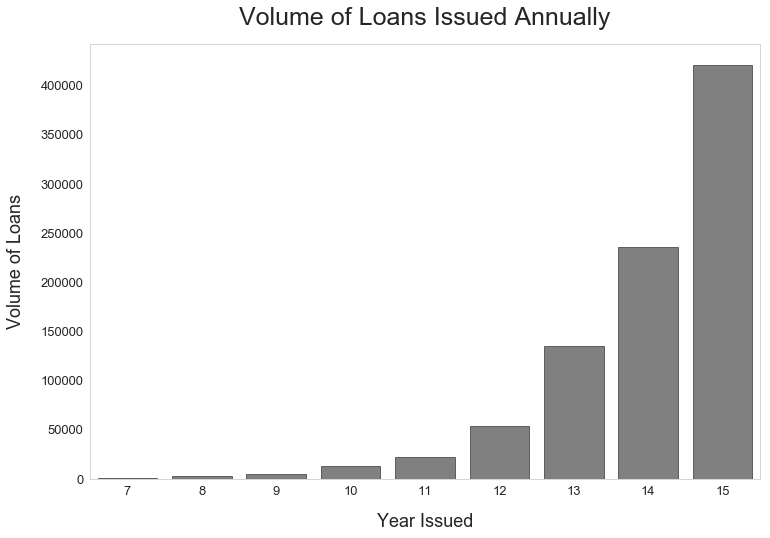

In [18]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid", {'axes.grid': False})
ax = sns.barplot(x=df_loan_year.index, y='id', data=df_loan_year, color='grey', edgecolor="black", linewidth=0.5)
ax.set_title("Volume of Loans Issued Annually", y=1.03, fontsize=25)
ax.set_xlabel("Year Issued",fontsize=18, labelpad = 15)
ax.set_ylabel("Volume of Loans",fontsize=18, labelpad = 15)
ax.tick_params(labelsize=13)
plt.show()

---

## Pre-processing

In [19]:
df_loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

Retrieving rows that contain data on closed loans only (i.e. loans whose status is "Fully Paid", "Charged Off", "Default", "Does not meet the credit policy. Status:Fully Paid", and "Does not meet the credit policy. Status:Charged Off"). Data on open loans will not be used going forward as the final status/outcome for these loans is unknown.

In [20]:
df_loan = df_loan.loc[(df_loan['loan_status'] == 'Fully Paid') | (df_loan['loan_status'] == 'Charged Off') 
| (df_loan['loan_status'] == 'Default') | (df_loan['loan_status'] == 
'Does not meet the credit policy. Status:Fully Paid') | (df_loan['loan_status'] ==
'Does not meet the credit policy. Status:Charged Off')]

In [21]:
df_loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [22]:
df_loan.shape

(256939, 75)

In [23]:
df_loan['loan_status'].value_counts()

Fully Paid                                             207723
Charged Off                                             45248
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [24]:
# Creating the new "outcome" column to capture the outcome - "Paid Off" (0) or "In Default" (1)
df_loan['outcome'] = np.where((df_loan['loan_status'] == 'Fully Paid') | (df_loan['loan_status'] ==
'Does not meet the credit policy. Status:Fully Paid'), 0, 1)

In [25]:
df_loan['outcome'].value_counts()

0    209711
1     47228
Name: outcome, dtype: int64

In [26]:
# There is 256,939 rows in the modified data set.
df_loan.shape

(256939, 76)

In [27]:
# Checking how many rows with NaN values are there in the dataframe and in what columns.
df_loan.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       14169
emp_length                      10002
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_y                             0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           166071
purpose                             0
title                              15
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [28]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_y', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_j

In [29]:
# This gives me the fraction of NaN values for each column.
df_loan.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.055145
emp_length                     0.038928
home_ownership                 0.000000
annual_inc                     0.000016
verification_status            0.000000
issue_y                        0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                           0.646344
purpose                        0.000000
title                          0.000058
zip_code                       0.000000
addr_state                     0.000000


In [30]:
# This gives me the index of all columns where fraction of NaN values is below 50%.
df_loan.columns[df_loan.isnull().mean() < 0.5]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_y', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'outcome'],
      dtype='object')

In [31]:
# I'll drop columns where NaN values represent 50% (or more) of all values first.
df_loan = df_loan[df_loan.columns[df_loan.isnull().mean() < 0.5]]

In [32]:
# 22 columns were dropped.
df_loan.shape

(256939, 54)

In [33]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_y', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'outcome'],
      dtype='object')

Now I'll review column descriptions and drop columns that are not meaningful for the purpose of predicting default.

In [34]:
# Removed 'zip_code', 'earliest_cr_line', and 'last_credit_pull_d' columns due to high number of distinct values
# in these columns. Removed 'application_type' column as the vast majority of applications are individual. 

columns = ['id', 'member_id', 'emp_title', 'issue_d', 'loan_status', 'url', 'title', 'recoveries', 
'collection_recovery_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'zip_code',
'earliest_cr_line', 'last_credit_pull_d', 'application_type']

df_loan.drop(columns, inplace=True, axis=1)

In [35]:
# 17 columns were dropped.
df_loan.shape

(256939, 37)

In [36]:
df_loan.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length             10002
home_ownership             0
annual_inc                 4
verification_status        0
issue_y                    0
pymnt_plan                 0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs               29
inq_last_6mths            29
open_acc                  29
pub_rec                   29
revol_bal                  0
revol_util               240
total_acc                 29
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
last_pymnt_d             548
last_pymnt_amnt            0
policy_code   

In [37]:
# Will drop "total_rev_hi_lim" column as well as it contains 66,475 NaN values.
df_loan.drop('total_rev_hi_lim', inplace=True, axis=1)

In [38]:
df_loan.shape

(256939, 36)

In [39]:
df_loan.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length             10002
home_ownership             0
annual_inc                 4
verification_status        0
issue_y                    0
pymnt_plan                 0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs               29
inq_last_6mths            29
open_acc                  29
pub_rec                   29
revol_bal                  0
revol_util               240
total_acc                 29
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
last_pymnt_d             548
last_pymnt_amnt            0
policy_code   

In [40]:
# Will replace NaNs in "emp_length" column with zeroes.
df_loan['emp_length'].fillna(0, inplace=True)

In [41]:
df_loan['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years', 0],
      dtype=object)

In [42]:
# Will replace NaNs in "annual_inc" column with zeroes.
df_loan['annual_inc'].fillna(0, inplace=True)

In [43]:
df_loan['delinq_2yrs'].unique()

array([ 0.,  2.,  3.,  1.,  4.,  6.,  5.,  8.,  7.,  9., 11., nan, 13.,
       15., 10., 17., 18., 12., 29., 14., 22., 16., 19.])

In [44]:
# Will replace NaNs in "delinq_2yrs" column with the mode for the column.
df_loan['delinq_2yrs'].fillna(df_loan['delinq_2yrs'].mode()[0], inplace=True)

In [45]:
df_loan['delinq_2yrs'].unique()

array([ 0.,  2.,  3.,  1.,  4.,  6.,  5.,  8.,  7.,  9., 11., 13., 15.,
       10., 17., 18., 12., 29., 14., 22., 16., 19.])

In [46]:
# Will replace NaNs in "inq_last_6mths" column with the mode for the column.
df_loan['inq_last_6mths'].fillna(df_loan['inq_last_6mths'].mode()[0], inplace=True)

In [47]:
# Will replace NaNs in "open_acc" column with the median value for the column.
df_loan['open_acc'].fillna(df_loan['open_acc'].median(), inplace=True)

In [48]:
# Will replace NaNs in "pub_rec" column with the median value for the column.
df_loan['pub_rec'].fillna(df_loan['pub_rec'].median(), inplace=True)

In [49]:
# Will replace NaNs in "revol_util" column with the mean value for the column.
df_loan['revol_util'].fillna(df_loan['revol_util'].mean(), inplace=True)

In [50]:
# Will replace NaNs in "total_acc" column with the mode value for the column.
df_loan['total_acc'].fillna(df_loan['total_acc'].mode()[0], inplace=True)

In [51]:
# Will replace NaNs in "last_pymnt_d" column with zeroes.
df_loan['last_pymnt_d'].fillna(0, inplace=True)

In [52]:
# There is no more NaN values in the dataframe.
df_loan.isna().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_y                0
pymnt_plan             0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
initial_list_status    0
out_prncp              0
out_prncp_inv          0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
total_rec_late_fee     0
last_pymnt_d           0
last_pymnt_amnt        0
policy_code            0
outcome                0
dtype: int64

In [53]:
df_loan.shape

(256939, 36)

In [54]:
# Assigning labels (0 or 1) to variable y and the rest of data to variable X.
y = df_loan.pop('outcome')
X = df_loan

In [55]:
y.shape

(256939,)

In [56]:
X.shape

(256939, 35)

In [57]:
X.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_y', 'pymnt_plan', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'policy_code'],
      dtype='object')

In [58]:
X.dtypes

loan_amnt              float64
funded_amnt            float64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_y                  int64
pymnt_plan              object
purpose                 object
addr_state              object
dti                    float64
delinq_2yrs            float64
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util             float64
total_acc              float64
initial_list_status     object
out_prncp              float64
out_prncp_inv          float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
total_rec_late_fee     float64
last_pym

In [59]:
# Splitting the data into train and test data sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(179857, 35)
(77082, 35)
(179857,)
(77082,)


In [61]:
# Converting categorical columns to binary columns through one-hot encoding.
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [62]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_y,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,policy_code,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_0,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,last_pymnt_d_0,last_pymnt_d_Apr-2008,last_pymnt_d_Apr-2009,last_pymnt_d_Apr-2010,last_pymnt_d_Apr-2011,last_pymnt_d_Apr-2012,last_pymnt_d_Apr-2013,last_pymnt_d_Apr-2014,last_pymnt_d_Apr-2015,last_pymnt_d_Aug-2008,last_pymnt_d_Aug-2009,last_pymnt_d_Aug-2010,last_pymnt_d_Aug-2011,last_pymnt_d_Aug-2012,last_pymnt_d_Aug-2013,last_pymnt_d_Aug-2014,last_pymnt_d_Aug-2015,last_pymnt_d_Dec-2007,last_pymnt_d_Dec-2008,last_pymnt_d_Dec-2009,last_pymnt_d_Dec-2010,last_pymnt_d_Dec-2011,last_pymnt_d_Dec-2012,last_pymnt_d_Dec-2013,last_pymnt_d_Dec-2014,last_pymnt_d_Dec-2015,last_pymnt_d_Feb-2008,last_pymnt_d_Feb-2009,last_pymnt_d_Feb-2010,last_pymnt_d_Feb-2011,last_pymnt_d_Feb-2012,last_pymnt_d_Feb-2013,last_pymnt_d_Feb-2014,last_pymnt_d_Feb-2015,last_pymnt_d_Jan-2008,last_pymnt_d_Jan-2009,last_pymnt_d_Jan-2010,last_pymnt_d_Jan-2011,last_pymnt_d_Jan-2012,last_pymnt_d_Jan-2013,last_pymnt_d_Jan-2014,last_pymnt_d_Jan-2015,last_pymnt_d_Jan-2016,last_pymnt_d_Jul-2008,last_pymnt_d_Jul-2009,last_pymnt_d_Jul-2010,last_pymnt_d_Jul-2011,last_pymnt_d_Jul-2012,last_pymnt_d_Jul-2013,last_pymnt_d_Jul-2014,last_pymnt_d_Jul-2015,last_pymnt_d_Jun-2008,last_pymnt_d_Jun-2009,last_pymnt_d_Jun-2010,last_pymnt_d_Jun-2011,last_pymnt_d_Jun-2012,last_pymnt_d_Jun-2013,last_pymnt_d_Jun-2014,last_pymnt_d_Jun-2015,last_pymnt_d_Mar-2008,last_pymnt_d_Mar-2009,last_pymnt_d_Mar-2010,last_pymnt_d_Mar-2011,last_pymnt_d_Mar-2012,last_pymnt_d_Mar-2013,last_pymnt_d_Mar-2014,last_pymnt_d_Mar-2015,last_pymnt_d_May-2008,last_pymnt_d_May-2009,last_pymnt_d_May-2010,last_pymnt_d_May-2011,last_pymnt_d_May-2012,last_pymnt_d_May-2013,last_pymnt_d_May-2014,last_pymnt_d_May-2015,last_pymnt_d_Nov-2008,last_pymn

In [63]:
X_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_y,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,policy_code,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_0,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,last_pymnt_d_0,last_pymnt_d_Apr-2008,last_pymnt_d_Apr-2009,last_pymnt_d_Apr-2010,last_pymnt_d_Apr-2011,last_pymnt_d_Apr-2012,last_pymnt_d_Apr-2013,last_pymnt_d_Apr-2014,last_pymnt_d_Apr-2015,last_pymnt_d_Aug-2008,last_pymnt_d_Aug-2009,last_pymnt_d_Aug-2010,last_pymnt_d_Aug-2011,last_pymnt_d_Aug-2012,last_pymnt_d_Aug-2013,last_pymnt_d_Aug-2014,last_pymnt_d_Aug-2015,last_pymnt_d_Dec-2007,last_pymnt_d_Dec-2008,last_pymnt_d_Dec-2009,last_pymnt_d_Dec-2010,last_pymnt_d_Dec-2011,last_pymnt_d_Dec-2012,last_pymnt_d_Dec-2013,last_pymnt_d_Dec-2014,last_pymnt_d_Dec-2015,last_pymnt_d_Feb-2009,last_pymnt_d_Feb-2010,last_pymnt_d_Feb-2011,last_pymnt_d_Feb-2012,last_pymnt_d_Feb-2013,last_pymnt_d_Feb-2014,last_pymnt_d_Feb-2015,last_pymnt_d_Jan-2008,last_pymnt_d_Jan-2009,last_pymnt_d_Jan-2010,last_pymnt_d_Jan-2011,last_pymnt_d_Jan-2012,last_pymnt_d_Jan-2013,last_pymnt_d_Jan-2014,last_pymnt_d_Jan-2015,last_pymnt_d_Jan-2016,last_pymnt_d_Jul-2008,last_pymnt_d_Jul-2009,last_pymnt_d_Jul-2010,last_pymnt_d_Jul-2011,last_pymnt_d_Jul-2012,last_pymnt_d_Jul-2013,last_pymnt_d_Jul-2014,last_pymnt_d_Jul-2015,last_pymnt_d_Jun-2008,last_pymnt_d_Jun-2009,last_pymnt_d_Jun-2010,last_pymnt_d_Jun-2011,last_pymnt_d_Jun-2012,last_pymnt_d_Jun-2013,last_pymnt_d_Jun-2014,last_pymnt_d_Jun-2015,last_pymnt_d_Mar-2008,last_pymnt_d_Mar-2009,last_pymnt_d_Mar-2010,last_pymnt_d_Mar-2011,last_pymnt_d_Mar-2012,last_pymnt_d_Mar-2013,last_pymnt_d_Mar-2014,last_pymnt_d_Mar-2015,last_pymnt_d_May-2008,last_pymnt_d_May-2009,last_pymnt_d_May-2010,last_pymnt_d_May-2011,last_pymnt_d_May-2012,last_pymnt_d_May-2013,last_pymnt_d_May-2014,last_pymnt_d_May-2015,last_pymnt_d_Nov-2008,last_pymnt_d_Nov-2009,last_pymnt_d_Nov-2010,last_pymnt_d_Nov-20

In [64]:
X_train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'issue_y', 'dti', 'delinq_2yrs',
       'inq_last_6mths',
       ...
       'last_pymnt_d_Oct-2014', 'last_pymnt_d_Oct-2015',
       'last_pymnt_d_Sep-2008', 'last_pymnt_d_Sep-2009',
       'last_pymnt_d_Sep-2010', 'last_pymnt_d_Sep-2011',
       'last_pymnt_d_Sep-2012', 'last_pymnt_d_Sep-2013',
       'last_pymnt_d_Sep-2014', 'last_pymnt_d_Sep-2015'],
      dtype='object', length=257)

In [65]:
X_test.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'issue_y', 'dti', 'delinq_2yrs',
       'inq_last_6mths',
       ...
       'last_pymnt_d_Oct-2014', 'last_pymnt_d_Oct-2015',
       'last_pymnt_d_Sep-2008', 'last_pymnt_d_Sep-2009',
       'last_pymnt_d_Sep-2010', 'last_pymnt_d_Sep-2011',
       'last_pymnt_d_Sep-2012', 'last_pymnt_d_Sep-2013',
       'last_pymnt_d_Sep-2014', 'last_pymnt_d_Sep-2015'],
      dtype='object', length=254)

In [66]:
X_test_columns = list(X_test)
X_test_columns

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'issue_y',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'last_pymnt_amnt',
 'policy_code',
 'term_ 36 months',
 'term_ 60 months',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'sub_grade_A1',
 'sub_grade_A2',
 'sub_grade_A3',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 'sub_grade_C1',
 'sub_grade_C2',
 'sub_grade_C3',
 'sub_grade_C4',
 'sub_grade_C5',
 'sub_grade_D1',
 'sub_grade_D2',
 'sub_grade_D3',
 'sub_grade_D4',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E5',
 'sub_grade_F1',
 'sub_grade_F2',
 'sub_grade_F3',
 'sub_grade_F4',
 

In [67]:
X_train = X_train[X_test_columns]

In [68]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_y,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,policy_code,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_0,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,last_pymnt_d_0,last_pymnt_d_Apr-2008,last_pymnt_d_Apr-2009,last_pymnt_d_Apr-2010,last_pymnt_d_Apr-2011,last_pymnt_d_Apr-2012,last_pymnt_d_Apr-2013,last_pymnt_d_Apr-2014,last_pymnt_d_Apr-2015,last_pymnt_d_Aug-2008,last_pymnt_d_Aug-2009,last_pymnt_d_Aug-2010,last_pymnt_d_Aug-2011,last_pymnt_d_Aug-2012,last_pymnt_d_Aug-2013,last_pymnt_d_Aug-2014,last_pymnt_d_Aug-2015,last_pymnt_d_Dec-2007,last_pymnt_d_Dec-2008,last_pymnt_d_Dec-2009,last_pymnt_d_Dec-2010,last_pymnt_d_Dec-2011,last_pymnt_d_Dec-2012,last_pymnt_d_Dec-2013,last_pymnt_d_Dec-2014,last_pymnt_d_Dec-2015,last_pymnt_d_Feb-2009,last_pymnt_d_Feb-2010,last_pymnt_d_Feb-2011,last_pymnt_d_Feb-2012,last_pymnt_d_Feb-2013,last_pymnt_d_Feb-2014,last_pymnt_d_Feb-2015,last_pymnt_d_Jan-2008,last_pymnt_d_Jan-2009,last_pymnt_d_Jan-2010,last_pymnt_d_Jan-2011,last_pymnt_d_Jan-2012,last_pymnt_d_Jan-2013,last_pymnt_d_Jan-2014,last_pymnt_d_Jan-2015,last_pymnt_d_Jan-2016,last_pymnt_d_Jul-2008,last_pymnt_d_Jul-2009,last_pymnt_d_Jul-2010,last_pymnt_d_Jul-2011,last_pymnt_d_Jul-2012,last_pymnt_d_Jul-2013,last_pymnt_d_Jul-2014,last_pymnt_d_Jul-2015,last_pymnt_d_Jun-2008,last_pymnt_d_Jun-2009,last_pymnt_d_Jun-2010,last_pymnt_d_Jun-2011,last_pymnt_d_Jun-2012,last_pymnt_d_Jun-2013,last_pymnt_d_Jun-2014,last_pymnt_d_Jun-2015,last_pymnt_d_Mar-2008,last_pymnt_d_Mar-2009,last_pymnt_d_Mar-2010,last_pymnt_d_Mar-2011,last_pymnt_d_Mar-2012,last_pymnt_d_Mar-2013,last_pymnt_d_Mar-2014,last_pymnt_d_Mar-2015,last_pymnt_d_May-2008,last_pymnt_d_May-2009,last_pymnt_d_May-2010,last_pymnt_d_May-2011,last_pymnt_d_May-2012,last_pymnt_d_May-2013,last_pymnt_d_May-2014,last_pymnt_d_May-2015,last_pymnt_d_Nov-2008,last_pymnt_d_Nov-2009,last_pymnt_d_Nov-2010,last_pymnt_d_Nov-20

In [69]:
X_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_y,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,policy_code,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_0,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,last_pymnt_d_0,last_pymnt_d_Apr-2008,last_pymnt_d_Apr-2009,last_pymnt_d_Apr-2010,last_pymnt_d_Apr-2011,last_pymnt_d_Apr-2012,last_pymnt_d_Apr-2013,last_pymnt_d_Apr-2014,last_pymnt_d_Apr-2015,last_pymnt_d_Aug-2008,last_pymnt_d_Aug-2009,last_pymnt_d_Aug-2010,last_pymnt_d_Aug-2011,last_pymnt_d_Aug-2012,last_pymnt_d_Aug-2013,last_pymnt_d_Aug-2014,last_pymnt_d_Aug-2015,last_pymnt_d_Dec-2007,last_pymnt_d_Dec-2008,last_pymnt_d_Dec-2009,last_pymnt_d_Dec-2010,last_pymnt_d_Dec-2011,last_pymnt_d_Dec-2012,last_pymnt_d_Dec-2013,last_pymnt_d_Dec-2014,last_pymnt_d_Dec-2015,last_pymnt_d_Feb-2009,last_pymnt_d_Feb-2010,last_pymnt_d_Feb-2011,last_pymnt_d_Feb-2012,last_pymnt_d_Feb-2013,last_pymnt_d_Feb-2014,last_pymnt_d_Feb-2015,last_pymnt_d_Jan-2008,last_pymnt_d_Jan-2009,last_pymnt_d_Jan-2010,last_pymnt_d_Jan-2011,last_pymnt_d_Jan-2012,last_pymnt_d_Jan-2013,last_pymnt_d_Jan-2014,last_pymnt_d_Jan-2015,last_pymnt_d_Jan-2016,last_pymnt_d_Jul-2008,last_pymnt_d_Jul-2009,last_pymnt_d_Jul-2010,last_pymnt_d_Jul-2011,last_pymnt_d_Jul-2012,last_pymnt_d_Jul-2013,last_pymnt_d_Jul-2014,last_pymnt_d_Jul-2015,last_pymnt_d_Jun-2008,last_pymnt_d_Jun-2009,last_pymnt_d_Jun-2010,last_pymnt_d_Jun-2011,last_pymnt_d_Jun-2012,last_pymnt_d_Jun-2013,last_pymnt_d_Jun-2014,last_pymnt_d_Jun-2015,last_pymnt_d_Mar-2008,last_pymnt_d_Mar-2009,last_pymnt_d_Mar-2010,last_pymnt_d_Mar-2011,last_pymnt_d_Mar-2012,last_pymnt_d_Mar-2013,last_pymnt_d_Mar-2014,last_pymnt_d_Mar-2015,last_pymnt_d_May-2008,last_pymnt_d_May-2009,last_pymnt_d_May-2010,last_pymnt_d_May-2011,last_pymnt_d_May-2012,last_pymnt_d_May-2013,last_pymnt_d_May-2014,last_pymnt_d_May-2015,last_pymnt_d_Nov-2008,last_pymnt_d_Nov-2009,last_pymnt_d_Nov-2010,last_pymnt_d_Nov-20

In [70]:
# Checking if column names are the same in train and test data sets. They are.
list(X_test) == list(X_train)

True

In [71]:
X_train.shape

(179857, 254)

In [72]:
X_test.shape

(77082, 254)

In [73]:
# Scaling the data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
# Doing PCA to reduce the number of features to 100 most important ones in order to prevent overfitting.
from sklearn.decomposition import PCA

reducer = PCA(n_components=100)
reducer.fit(X_train)
X_train = reducer.transform(X_train)
X_test = reducer.transform(X_test)

In [75]:
X_train.shape

(179857, 100)

In [76]:
X_test.shape

(77082, 100)

In [77]:
# Now I need to deal with class imbalances.
y_train.value_counts()

0    146797
1     33060
Name: outcome, dtype: int64

There are more instances of negative classes (paid off) than positive classes (in default). Will use SMOTE to create additional instances of the positive class and add them to train data set.

In [78]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(ratio = 1.0)

X_train_balanced, y_train_balanced = sm.fit_sample(X_train, y_train)

In [79]:
X_train_balanced.shape

(293594, 100)

In [80]:
np.unique(y_train_balanced, return_counts=True)

(array([0, 1]), array([146797, 146797]))

In [81]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([62914, 14168]))

---

## Modelling

### Determining Performance Baseline

- Will be using accuracy rate and F1 score on test data for predictions made by dummy classifier as model performance baseline. F1 is a weighted average of precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. I believe accuracy and F1 score would be good metrics as both precision and recall are important. Incorreclty classifying loans as class 0 would be equally bad as incorreclty classifying loans as class 1, so both precision and recall are important.
- Setting strategy to "most frequent" as my dataset is imbalanced (~ 20% of instances are class 1). The model will classify all instances as class 0.

In [81]:
# Fitting dummy classifier to original X_train and y_train as opposed to balanced versions 
# to make sure that the most frequent class is 0.
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
print(f'Accuracy Score on Test data:', dummy.score(X_test, y_test))

Accuracy Score on Test data: 0.8161957396019823


Dummy classifier's accuracy on test data is **81.62%** as 81.62% of instances in the test data set are class 0 (i.e. "paid off").

In [82]:
# Retrieving unqiue predicted classes, F1 score, and confusion matrix.
y_test_pred = dummy.predict(X_test)
print(np.unique(y_test_pred))
print(f1_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

[0]
0.0
[[62914     0]
 [14168     0]]


- All instances/loans from the test data set were classified as class 0.
- F1 score is **0** (lowest possible score) as recall is 0. Recall is 0 because there is no instances that were classified as class 1.

---

### Logistic Regression

*I will not be using grid-search to find the best model to keep computation time reasonable.*

Using 5-fold cross validation to pick the best C value.

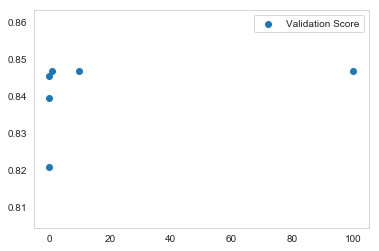

Best Model:  4
Cross-Validation Score:  0.8468566302633574


In [83]:
# Using default solver ('liblinear') and looping through the list of C values.

validation_score_list = []

c_values = [0.0001, 0.001, 0.01, 1, 10, 100]

for i in c_values:
    model = LogisticRegression(C=i)
    validation_score = np.mean(cross_val_score(model, X_train_balanced, y_train_balanced, cv = 5))
    validation_score_list.append(validation_score)

plt.scatter(c_values, validation_score_list, label="Validation Score")
plt.legend()
plt.show()

print("Best Model: ", validation_score_list.index(np.max(validation_score_list))+1)
print("Cross-Validation Score: ", np.max(validation_score_list))

Cross-validation score for the best model (model 4) is **84.686%** (C value = 1).

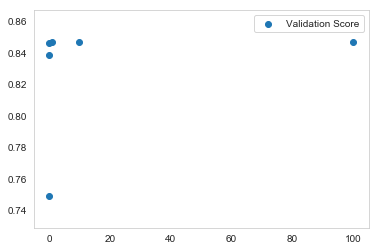

Best Model:  4
Cross-Validation Score:  0.8468736602361094


In [85]:
# Looping through the same list of C values and using default solver ('liblinear'), and penalty set to 'l1'.

validation_score_list = []

c_values = [0.0001, 0.001, 0.01, 1, 10, 100]

for i in c_values:
    model = LogisticRegression(C=i, penalty='l1')
    validation_score = np.mean(cross_val_score(model, X_train_balanced, y_train_balanced, cv = 5))
    validation_score_list.append(validation_score)

plt.scatter(c_values, validation_score_list, label="Validation Score")
plt.legend()
plt.show()

print("Best Model: ", validation_score_list.index(np.max(validation_score_list))+1)
print("Cross-Validation Score: ", np.max(validation_score_list))

Cross-validation score for the best model (model 4) is **84.687%** (C value = 1).

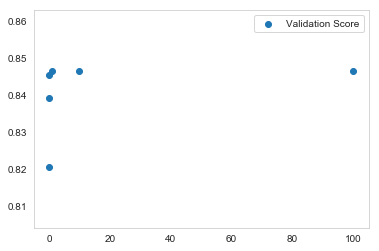

Best Model:  5
Cross-Validation Score:  0.8464615243384234


In [86]:
# Looping through the same list of C values with solver set to 'saga' this time (only supports l2 penalty).

validation_score_list = []

c_values = [0.0001, 0.001, 0.01, 1, 10, 100]

for i in c_values:
    model = LogisticRegression(C=i, solver='saga')
    validation_score = np.mean(cross_val_score(model, X_train_balanced, y_train_balanced, cv = 5))
    validation_score_list.append(validation_score)

plt.scatter(c_values, validation_score_list, label="Validation Score")
plt.legend()
plt.show()

print("Best Model: ", validation_score_list.index(np.max(validation_score_list))+1)
print("Cross-Validation Score: ", np.max(validation_score_list))

Cross-validation score for the best model (model 5) is **84.646%** (C value = 10).

Cross-validation score for the best of all Logistic Regression models was **84.687%** (default solver, C value = 1, penalty = 'l1').

In [91]:
# Instantiating the best model, fitting to train data, and scoring on train and test data sets.
logit = LogisticRegression(C=1, penalty='l1')
logit.fit(X_train_balanced, y_train_balanced)
print(f'Accuracy Score on Train data:', logit.score(X_train_balanced, y_train_balanced))
print(f'Accuracy Score on Test data:', logit.score(X_test, y_test))

Accuracy Score on Train data: 0.8470881557525017
Accuracy Score on Test data: 0.8357463480449392


Accuracy score on test data is **83.57%**.

In [92]:
# Now I'll take a look at F1 score and confusion matrix for the best Logistic Regression model.
y_test_pred = logit.predict(X_test)
print(f1_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

0.6524281439591513
[[52538 10376]
 [ 2285 11883]]


- F1 score is **0.65**.
- ~ 10,400 instances were incorrectly classified as class 1.
- ~ 2,300 instances were incorrectly classified as class 0.

**Best Logistic Regression model:** 
- Default solver, C value = 1, penalty = 'l1'.
- Accuracy score on test data is **83.57%, ~ 2% improvement against the baseline** (81.62%).
- F1 score is **0.65** (dummy classifier had F1 score of 0). 

---

### Decision Tree

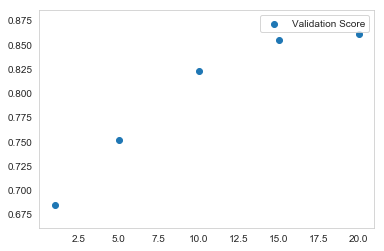

Best Model:  5


In [87]:
# Using 5-fold cross validation to pick the best max_depth value.

validation_score_list = []

max_depth = [1, 5, 10, 15, 20]

for i in max_depth:
    model = tree.DecisionTreeClassifier(max_depth=i)
    validation_score = np.mean(cross_val_score(model, X_train_balanced, y_train_balanced, cv = 5))
    validation_score_list.append(validation_score)

plt.scatter(max_depth, validation_score_list, label="Validation Score")
plt.legend()
plt.show()

print("Best Model: ", validation_score_list.index(np.max(validation_score_list))+1)

In [88]:
# Setting max_depth to 20 as per cross validation results.

DT = tree.DecisionTreeClassifier(max_depth=20)
DT.fit(X_train_balanced, y_train_balanced)
print(f'Accuracy Score on Train data:', DT.score(X_train_balanced, y_train_balanced))
print(f'Accuracy Score on Test data:', DT.score(X_test, y_test))

Accuracy Score on Train data: 0.9829322125111548
Accuracy Score on Test data: 0.8143924651669651


Accuracy score on test data is **81.44%** (max_depth = 20). Best Logistic Regression model's accuracy is higher (83.57%). Dummy classifier had higher accuracy as well (81.62%).

In [89]:
# Retrieving F1 score and confusion matrix for the best Decision Tree model.
y_test_pred = DT.predict(X_test)
print(f1_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

0.5870399769086448
[[52606 10308]
 [ 3999 10169]]


- F1 score is **0.59**. Best Logistic Regression achieved higher F1 score (0.65).
- ~ 10,300 instances were incorrectly classified as class 1 (vs ~ 10,400 for the best Logistic Regression).
- ~ 4,000 instances were incorrectly classified as class 0 (vs ~ 2,300 for the best Logistic Regression).

---

### XGBoost

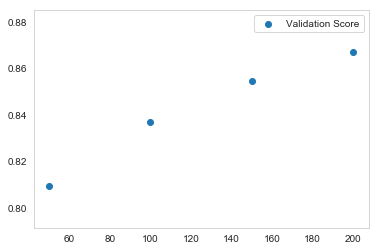

Best Model:  4
Cross-Validation Score:  0.867041029502022


In [93]:
# Using 5-fold cross validation to pick the best n_estimators value.

validation_score_list = []

num_estimators = [50, 100, 150, 200]

for i in num_estimators:
    model = XGBClassifier(n_estimators=i)
    validation_score = np.mean(cross_val_score(model, X_train_balanced, y_train_balanced, cv = 5))
    validation_score_list.append(validation_score)

plt.scatter(num_estimators, validation_score_list, label="Validation Score")
plt.legend()
plt.show()

print("Best Model: ", validation_score_list.index(np.max(validation_score_list))+1)
print("Cross-Validation Score: ", np.max(validation_score_list))

Cross-validation score for the best model (model 4) is **86.70%** (n_estimators = 200).

In [94]:
# Setting n_estimators to 200 as per cross validation results.

XGB = XGBClassifier(n_estimators=200)
XGB.fit(X_train_balanced, y_train_balanced)
print(f'Accuracy Score on Train data:', XGB.score(X_train_balanced, y_train_balanced))
print(f'Accuracy Score on Test data:', XGB.score(X_test, y_test))

Accuracy Score on Train data: 0.8719796726091132
Accuracy Score on Test data: 0.8485898134454217


Accuracy score on test data is **84.86%**.

In [95]:
# Retrieving F1 score and confusion matrix for the best XGBoost model.
y_test_pred = XGB.predict(X_test)
print(f1_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

0.6715447612078914
[[53480  9434]
 [ 2237 11931]]


F1 score is **0.67**.

**Best XGBoost model:** 
- n_estimators = 200.
- Accuracy score on test data is **84.86%, ~ 3.2% improvement against the baseline** (81.62%).
- Best Logistic Regression model's accuracy is 83.57%.
- F1 score is **0.67**. Best Logistic Regression had lower F1 score (0.65). Dummy classifier had F1 score of 0.
- ~ 9,400 instances were incorrectly classified as class 1 (vs ~ 10,400 for the best Logistic Regression).
- ~ 2,200 instances were incorrectly classified as class 0 (vs ~ 2,300 for the best Logistic Regression).

Accuracy and F1 score are higher for the best XGBoost model vs. best Logistic Regression model.

Will try using Random Forest model to see if I can achieve higher accuracy and F1 score than those of the best XGBoost model.

---

### Random Forest

*Not using grid search to find the best max_features and n_estimators combination due to computation time considerations.*

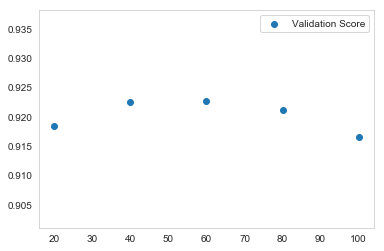

Best Model:  3
Cross-Validation Score:  0.9226790293939917


In [96]:
# Using 5-fold cross validation to pick the best max_features value. Setting number of estimators to 15.

validation_score_list = []

max_features = [20, 40, 60, 80, 100]

for i in max_features:
    model = RandomForestClassifier(n_estimators=15, max_features=i)
    validation_score = np.mean(cross_val_score(model, X_train_balanced, y_train_balanced, cv = 5))
    validation_score_list.append(validation_score)

plt.scatter(max_features, validation_score_list, label="Validation Score")
plt.legend()
plt.show()

print("Best Model: ", validation_score_list.index(np.max(validation_score_list))+1)
print("Cross-Validation Score: ", np.max(validation_score_list))

Cross-validation score for the best model (model 3) is **92.27%** (max_features = 60).

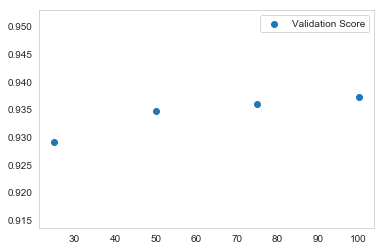

Best Model:  4
Cross-Validation Score:  0.937328507437711


In [97]:
# Using 5-fold cross validation to pick the best n_estimators value. Setting max_features to 60.

validation_score_list = []

num_estimators = [25, 50, 75, 100]

for i in num_estimators:
    model = RandomForestClassifier(n_estimators=i, max_features=60)
    validation_score = np.mean(cross_val_score(model, X_train_balanced, y_train_balanced, cv = 5))
    validation_score_list.append(validation_score)

plt.scatter(num_estimators, validation_score_list, label="Validation Score")
plt.legend()
plt.show()

print("Best Model: ", validation_score_list.index(np.max(validation_score_list))+1)
print("Cross-Validation Score: ", np.max(validation_score_list))

Cross-validation score for the best model (model 4) is **93.73%** (n_estimators = 100).

In [98]:
# Obtaining accuracy scores for the best Random Forest model.
RF = RandomForestClassifier(n_estimators=100, max_features=60)
RF.fit(X_train_balanced, y_train_balanced)
print(f'Accuracy Score on Train data:', RF.score(X_train_balanced, y_train_balanced))
print(f'Accuracy Score on Test data:', RF.score(X_test, y_test))

Accuracy Score on Train data: 0.9999965939358434
Accuracy Score on Test data: 0.8956954931112322


Accuracy on test data is **89.57%**.

In [99]:
# Retrieving F1 score and confusion matrix for the best Random Forest model.
y_test_pred = RF.predict(X_test)
print(f1_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

0.7305268802788578
[[58144  4770]
 [ 3270 10898]]


F1 score is **0.73**.

**Best Random Forest model:** 
- n_estimators = 100, max_features = 60.
- Accuracy score on test data is **89.57%, ~ 8% improvement against the baseline** (81.62%). 
- Best XGBoost model's accuracy is 84.86%. Best Logistic Regression model's accuracy is 83.57%. Dummy classifier's accuracy (baseline) is 81.62%.
- F1 score is **0.73**. Best XGBoost model achieved F1 score of 0.67. Best Logistic Regression achieved F1 score of 0.65. Dummy classifier had F1 score of 0.
- ~ 4,800 instances were incorrectly classified as class 1 vs. ~ 9,400 for the best XGBoost model.
- ~ 3,300 instances were incorrectly classified as class 0 vs. ~ 2,200 for the best XGBoost model.

Accuracy and F1 score are higher for the best Random Forest model vs. best XGBoost and logistic regression models.

As the next step I'll investigate if ensemble of best Random Forest models would have higher accuracy and F1 score on test data.

Will try to improve accuracy and F1 score by using an ensemble of best models.

---

## Ensemble

Using two best Random Forest models in ensemble.

In [100]:
RF_model_one = RandomForestClassifier(n_estimators=100, max_features=60)
RF_model_two = RandomForestClassifier(n_estimators=100, max_features=60)

ensemble = VotingClassifier(estimators=[('RF Model 1', RF_model_one),\
                                        ('RF Model 2', RF_model_two)],\
                                        voting="soft",\
                                        weights = [1,1])

ensemble.fit(X_train_balanced, y_train_balanced)
print(f'Accuracy Score on Train data:', ensemble.score(X_train_balanced, y_train_balanced))
print(f'Accuracy Score on Test data:', ensemble.score(X_test, y_test))

Accuracy Score on Train data: 1.0
Accuracy Score on Test data: 0.8977193119016112


Even though it seems like the ensemble of Random Forest models is overfitting (accuracy on train data is 100%), accuracy on test data has gone up to **89.77%**. It's 0.2% improvement compared to the best Random Forest model (89.57%) and ~ 8.2% improvement against the baseline (81.62%).

In [101]:
# Retrieving F1 score and confusion matrix for the ensemble of two Random Forest models.
y_test_pred = ensemble.predict(X_test)
print(f1_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

0.7360032145727298
[[58208  4706]
 [ 3178 10990]]


F1 score has gone up to **0.74**, it's 0.01 improvement compared to the best Random Forest model.

**Ensemble of models:** 
- 2 Random Forest models.
- Voting = 'soft'
- Both Random Forest models had the following parameters: n_estimators = 100, max_features = 60.
- Accuracy score on test data is **89.77%, ~ 8.2% improvement against the baseline (81.62%)**. 
- Best Random Forest model's accuracy is 89.57%. Best XGBoost model's accuracy is 84.86%. Best Logistic Regression model's accuracy is 83.57%. Dummy classifier's accuracy (baseline) is 81.62%.
- F1 score is **0.74**. Best Random Forest model had F1 score of 0.73. Best XGBoost model had F1 score of 0.67. Best Logistic Regression had F1 score of 0.65. Dummy classifier had F1 score of 0.
- ~ 4,700 instances were incorrectly classified as class 1 vs. ~ 4,800 for the best Random Forest model.
- ~ 3,200 instances were incorrectly classified as class 0 vs. ~ 3,300 for the best Random Forest model.

---

## Stacked Ensemble

Using the best XGBoost and Random Forest models as base classifiers and Logistic Regression as meta-classifier.

In [82]:
stacked_model = StackingClassifier(
    classifiers=[
    XGBClassifier(n_estimators=200),
    XGBClassifier(n_estimators=200),
    RandomForestClassifier(n_estimators=100, max_features=60),
    RandomForestClassifier(n_estimators=100, max_features=60)
],
    meta_classifier=LogisticRegression()
)

stacked_model.fit(X_train_balanced, y_train_balanced)
print(f'Accuracy Score on Train data:', stacked_model.score(X_train_balanced, y_train_balanced))
print(f'Accuracy Score on Test data:', stacked_model.score(X_test, y_test))

Accuracy Score on Train data: 1.0
Accuracy Score on Test data: 0.8949560208609014


- Stacked model is overfitting (accuracy on train data is 100%).
- Accuracy on test data has decreased to **89.5%**. It's ~ 7.9% improvement against the baseline (81.62%), but lower score compared to ensemble of Random Forest models (89.77%).

In [83]:
# Retrieving F1 score and confusion matrix for stacked ensemble.
y_test_pred = stacked_model.predict(X_test)
print(f1_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

0.7334496494058004
[[57845  5069]
 [ 3028 11140]]


F1 score has decreased from 0.74 to **0.73**.

**Stacked ensemble:** 
- 2 Random Forest and 2 XGBoost models.
- Both Random Forest models had the following parameters: n_estimators = 100, max_features = 60.
- Both XGBoost models had n_estimators = 200.
- Accuracy score on test data is **89.5%, ~ 7.9% improvement against the baseline (81.62%)**. 
- Ensemble of Random Forest models had accuracy of 89.77%. Best Random Forest model's accuracy is 89.57%. Best XGBoost model's accuracy is 84.86%. Best Logistic Regression model's accuracy is 83.57%. Dummy classifier's accuracy (baseline) is 81.62%.
- F1 score is **0.73**. Ensemble of Random Forest models had F1 score of 0.74. Best Random Forest model had F1 score of 0.73. Best XGBoost model had F1 score of 0.67. Best Logistic Regression had F1 score of 0.65. Dummy classifier had F1 score of 0.
- ~ 5,100 instances were incorrectly classified as class 1 vs. ~ 4,700 for ensemble of Random Forest models.
- ~ 3,000 instances were incorrectly classified as class 0 vs. ~ 3,200 for ensemble of Random Forest models.

---

## Result

Overall, ensemble of two Random Forest models achieved highest accuracy (89.77%) and F1 score (0.74) on test data.

---

## Potential Next Steps

1. Fitting models to data without conducting PCA to access impact to accuracy.
2. Hyperparameter tuning and cross-validation through grid search to find best hyperparameters for select models.
3. Try using SVM and assess how well best SVM model performs in terms of accuracy and F1 score.